<a href="https://colab.research.google.com/github/DenaAlharbi/COE292-PROJECT/blob/main/COE292_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                               COE292 Term 242 Project : Advanced IoT Agriculture

**Group No. 1**

**Section**: F02

**Group Members:**

| Group member name          |
| :------------------- |
| Shahad Alshamrani         |
| Dena Alharbi            |
| Farah          |
| Mariam
| Fatemah Almarhoon            |

#### Contributions:         

|names         |Percentage of work                                      |
| :------------- | :------------------------------------------------------- |
| Shahad         | Percentage of work 20%    |
|    Dena Alharbi       | Percentage of work 20%|
|Farah| Percentage of work 20%|
|Mariam | Percentage of work 20%  |
| Fatemah |Percentage of work 20%   |

---




#Summary of Classifocation Problem



Our data is about Advanced IoT Agriculture with 30,000 entries and 14 columns that are taken from a student's master’s thesis research. The data studies the quality of plants that grow in an IoT greenhouse compared to other plants that grow in a traditional greenhouse, then classified them into 6 different classes according to some significant features such as:

Average of chlorophyll in the plant (ACHP), which has a main role in plants' nutrition by performing photosynthesis process, average root diameter (ARD), which is directly connected to the plants ability to absorb water and nutrients from the soil, and plant height rate (PHR), which is measuring the dynamic growth of the plant over time and directly affected by the plants nutrition.   

Since most of our team members are from computer-related majors, we selected this data because it develops a new technological footprint in one of the most important life fields which can enhance automation in smart greenhouses.

No doubt it is difficult to classify such problems, especially when we consider the high dimensionality of data gained from containing many columns and the possibility of unexpected environmental external factors impact. However, classifying the data can give meaningful results.



#Data Exploratory Analysis:

## what has to be in this section: Dataset and feature manipulation, label explation and data visulization

###Label explanation  


Short Label explanation/description   

1. SA - Plants grown in the IoT greenhouse and have balanced root and vegetative growth.

2. SB - Plants grown in the IoT greenhouse that focus on vegetative growth (leaves and stems).

3. SC - Plants grown in the IoT greenhouse that focus on root growth.

4. TA - Plants grown in the traditional greenhouse with balanced growth but less efficient than SA.

5. TB - Plants grown in the traditional greenhouse that focus on vegetative growth.

6. TC - Plants grown in the traditional greenhouse that focus on root growth



In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file on Google Drive (direct download link)
url = 'https://drive.google.com/uc?id=18t_28QoHeSvUkj0KjXASGhgBo3UCKThI'

# Download the CSV file
output = 'file.csv'
gdown.download(url, output, quiet=False)

# Load the CSV file with a different encoding
df = pd.read_csv(output, encoding='ISO-8859-1')

Downloading...
From: https://drive.google.com/uc?id=18t_28QoHeSvUkj0KjXASGhgBo3UCKThI
To: /content/file.csv
100%|██████████| 6.90M/6.90M [00:00<00:00, 47.6MB/s]


In [ ]:
df.head(5)

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [ ]:
# Display the first few rows of the dataset to verify
print("Original Columns:")
df.head(5)
# Strip leading/trailing spaces from original column names
df.columns = df.columns.str.strip()

# Dictionary to map old column names to new column names
column_rename_map = {
    'Random': 'Identifier',
    'Average  of chlorophyll in the plant (ACHP)': 'Avg_Chlorophyll',
    'Plant height rate (PHR)': 'Plant_Height_Rate',
    'Average wet weight of the growth vegetative (AWWGV)': 'Avg_Wet_Weight_Veg',
    'Average leaf area of the plant (ALAP)': 'Avg_Leaf_Area',
    'Average number of plant leaves (ANPL)': 'Avg_Num_Leaves',
    'Average root diameter (ARD)': 'Avg_Root_Diameter',
    'Average dry weight of the root (ADWR)': 'Avg_Dry_Weight_Root',
    'Percentage of dry matter for vegetative growth (PDMVG)': 'Perc_Dry_Matter_Veg',
    'Average root length (ARL)': 'Avg_Root_Length',
    'Average wet weight of the root (AWWR)': 'Avg_Wet_Weight_Root',
    'Average dry weight of vegetative plants (ADWV)': 'Avg_Dry_Weight_Veg',
    'Percentage of dry matter for root growth (PDMRG)': 'Perc_Dry_Matter_Root',
    'Class': 'Class'
}

# Rename the columns
df.rename(columns=column_rename_map, inplace=True)

# Display the first few rows of the dataset with new column names to verify
print("Renamed Columns:")
print(df.head())

# Save the updated dataset (optional)
df.to_csv(output, index=False)

Original Columns:
Renamed Columns:
  Identifier  Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  \
0         R1        34.533468          54.566983            1.147449   
1         R1        34.489028          54.567692            1.149530   
2         R2        33.100405          67.067344            1.104647   
3         R1        34.498319          54.559049            1.137759   
4         R3        36.297008          45.588894            1.363205   

   Avg_Leaf_Area  Avg_Num_Leaves  Avg_Root_Diameter  Avg_Dry_Weight_Root  \
0    1284.229549        4.999713          16.274918             1.706810   
1    1284.247744        5.024259          16.269452             1.700930   
2    1009.208996        5.007652          15.980760             1.185391   
3    1284.227623        4.991501          16.276710             1.716396   
4     981.470310        4.003682          16.979894             0.777428   

   Perc_Dry_Matter_Veg  Avg_Root_Length  Avg_Wet_Weight_Root  \
0          

Summary before removing outliers:
       Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  Avg_Leaf_Area  \
count     30000.000000       30000.000000        30000.000000   30000.000000   
mean         38.060575          59.020331            1.247257    1063.639833   
std           4.441682          11.985213            0.245989     260.712823   
min          32.664004          37.020398            0.848351     658.488225   
25%          34.399604          51.059436            1.064865     875.501356   
50%          36.575753          55.912058            1.211328    1009.249081   
75%          42.300836          67.069465            1.501692    1243.866525   
max          46.431668          77.040610            1.775383    1751.031654   

       Avg_Num_Leaves  Avg_Root_Diameter  Avg_Dry_Weight_Root  \
count    30000.000000       30000.000000         30000.000000   
mean         3.944789          16.285792             1.000981   
std          0.702537           2.882793          

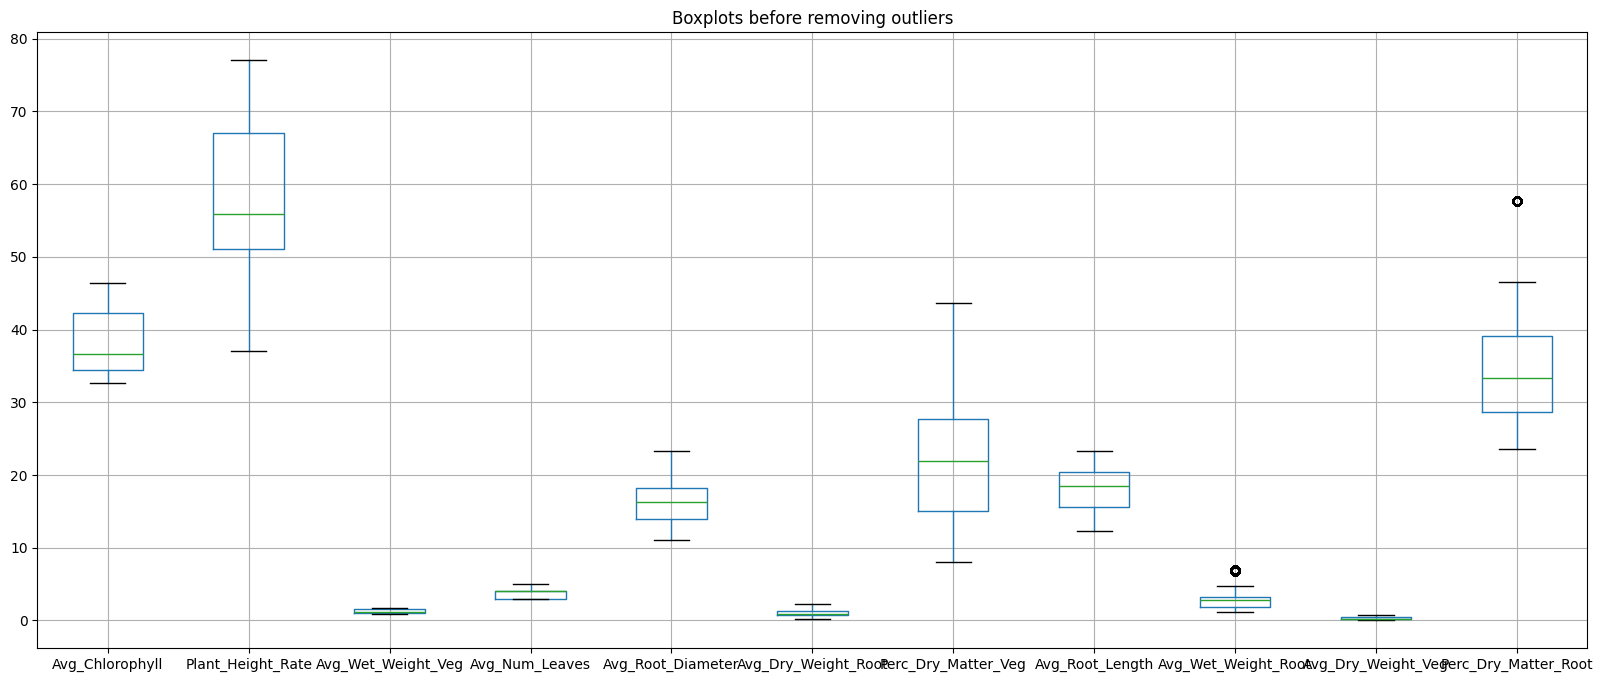

In [ ]:
import numpy as np
# Display the DataFrame summary before removing outliers
print("Summary before removing outliers:")
print(df.describe())


# Step 1: Save a copy of the column before deleting it
deleted_column_backup = df['Avg_Leaf_Area'].copy()

# Step 2: Delete the column from the DataFrame
df.drop('Avg_Leaf_Area', axis=1, inplace=True)

# At this point, the 'DeletedColumn' has been removed from the DataFrame


# Display the DataFrame to verify that the column has been re-added
print(df.head())

def remove_outliers(df, columns):
    for i, col in enumerate(columns):

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Handle outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Columns to check for outliers
num_columns = df.select_dtypes(include=['float64']).columns

# Summary of DataFrame before removing outliers
print("Summary before removing outliers:")
print(df.describe())

# Plotting boxplots before removing outliers
plt.figure(figsize=(20, 8))
df[num_columns].boxplot()
plt.title("Boxplots before removing outliers")
plt.show()

Summary after removing outliers:
       Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  Avg_Num_Leaves  \
count     26727.000000       26727.000000        26727.000000    26727.000000   
mean         38.429628          58.842719            1.236930        3.815586   
std           4.567177          12.514776            0.250882        0.633225   
min          32.664004          37.020398            0.848351        2.959173   
25%          34.372190          50.864478            1.047548        3.008681   
50%          36.599906          55.912951            1.216429        3.995729   
75%          42.331026          67.089910            1.385139        4.007665   
max          46.431668          77.040610            1.775383        5.029713   

       Avg_Root_Diameter  Avg_Dry_Weight_Root  Perc_Dry_Matter_Veg  \
count       26727.000000         26727.000000         26727.000000   
mean           15.859965             0.886843            23.243725   
std             2.481964   

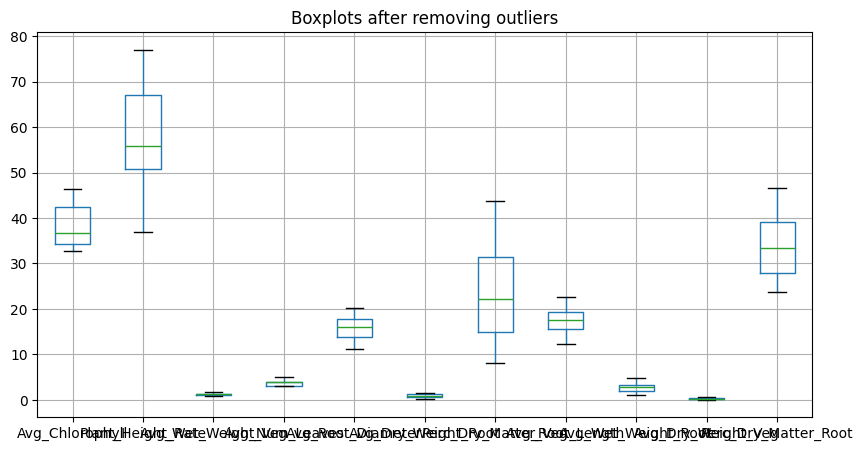

Number of rows before cleaning: 30000
Number of rows after cleaning: 26727


In [ ]:
# Removing outliers
df_cleaned = remove_outliers(df, num_columns)

# Summary of DataFrame after removing outliers
print("Summary after removing outliers:")
print(df_cleaned.describe())

# Plotting boxplots after removing outliers
plt.figure(figsize=(10, 5))
df_cleaned[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

# Checking the number of rows before and after cleaning
print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")
df= df_cleaned

In [ ]:
df.head(5)

,Identifier,Avg_Chlorophyll,Plant_Height_Rate,Avg_Wet_Weight_Veg,Avg_Num_Leaves,Avg_Root_Diameter,Avg_Dry_Weight_Root,Perc_Dry_Matter_Veg,Avg_Root_Length,Avg_Wet_Weight_Root,Avg_Dry_Weight_Veg,Perc_Dry_Matter_Root,Class
2,R2,33.100405,67.067344,1.104647,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
4,R3,36.297008,45.588894,1.363205,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
5,R3,36.287722,45.598585,1.353790,3.998621,16.991603,0.760842,31.403639,17.324861,2.745382,0.435148,27.927017,SA
7,R2,33.105558,67.073406,1.097444,4.991835,15.965588,1.189576,19.407307,20.838177,2.847526,0.216855,41.304762,SA
8,R2,33.092448,67.061659,1.103098,4.995131,15.964761,1.182838,19.387573,20.824335,2.857965,0.209869,41.318049,SA


In [ ]:
# Step 3: Re-add the column using the backup
df.insert(3, 'Avg_Leaf_Area', deleted_column_backup)
df.head(5)

,Identifier,Avg_Chlorophyll,Plant_Height_Rate,Avg_Leaf_Area,Avg_Wet_Weight_Veg,Avg_Num_Leaves,Avg_Root_Diameter,Avg_Dry_Weight_Root,Perc_Dry_Matter_Veg,Avg_Root_Length,Avg_Wet_Weight_Root,Avg_Dry_Weight_Veg,Perc_Dry_Matter_Root,Class
2,R2,33.100405,67.067344,1009.208996,1.104647,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
4,R3,36.297008,45.588894,981.470310,1.363205,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
5,R3,36.287722,45.598585,981.460993,1.353790,3.998621,16.991603,0.760842,31.403639,17.324861,2.745382,0.435148,27.927017,SA
7,R2,33.105558,67.073406,1009.239638,1.097444,4.991835,15.965588,1.189576,19.407307,20.838177,2.847526,0.216855,41.304762,SA
8,R2,33.092448,67.061659,1009.218887,1.103098,4.995131,15.964761,1.182838,19.387573,20.824335,2.857965,0.209869,41.318049,SA


In [ ]:
num_columns = df.select_dtypes(include=['float64']).columns

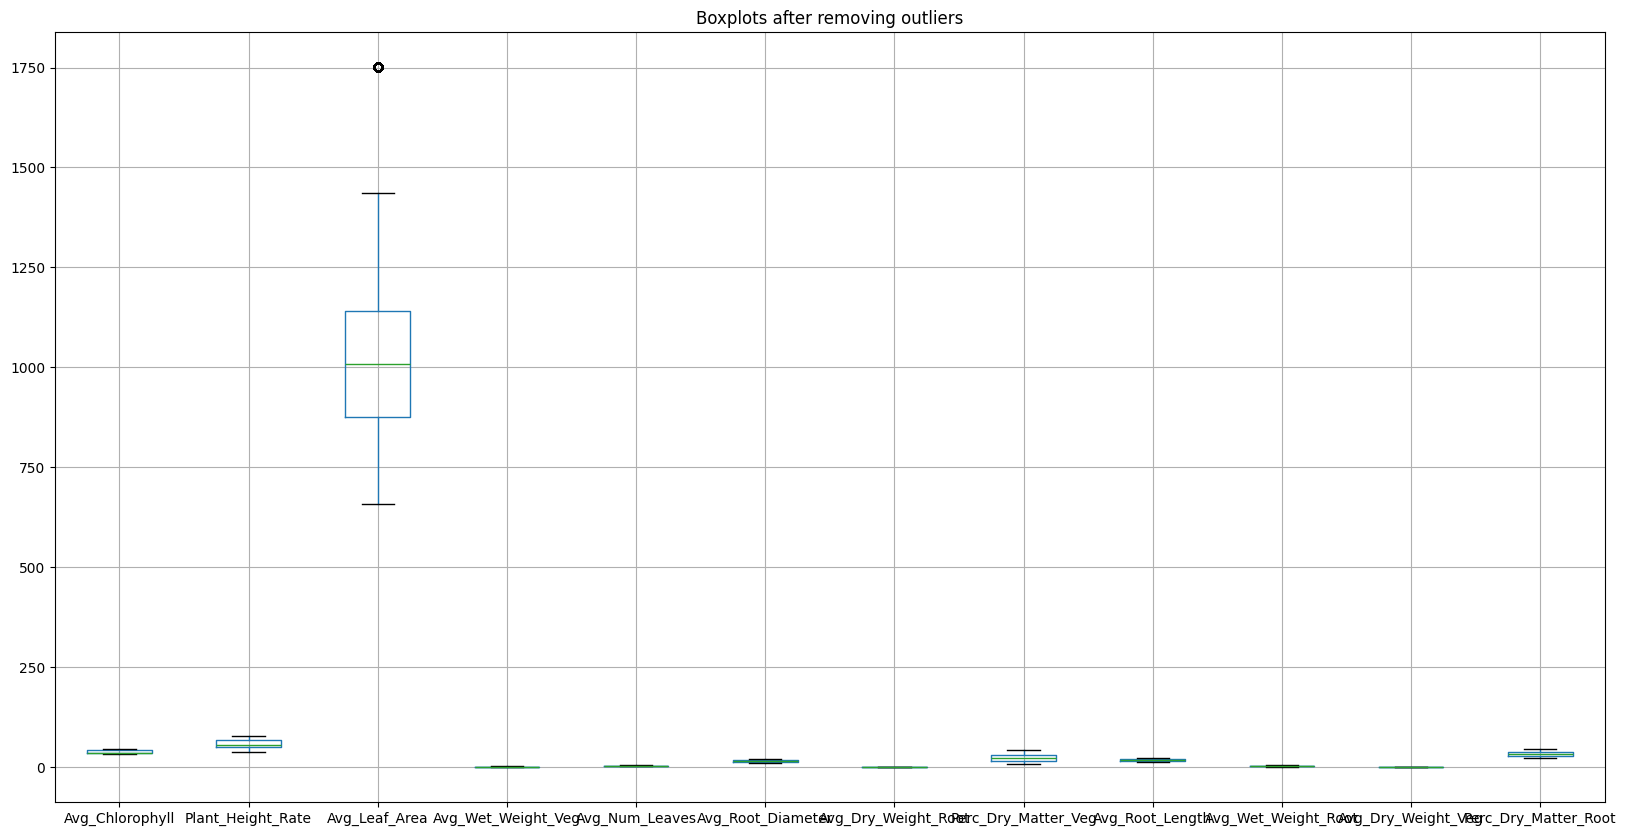

In [ ]:
# Plotting boxplots after removing outliers
plt.figure(figsize=(20, 10))
df[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

In [ ]:
# Specify the fourth column (index 3, as DataFrame indices are zero-based)
column_name = df.columns[3]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the fourth column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR

# Filter out the values above the upper bound
df = df[df[column_name] <= upper_bound]

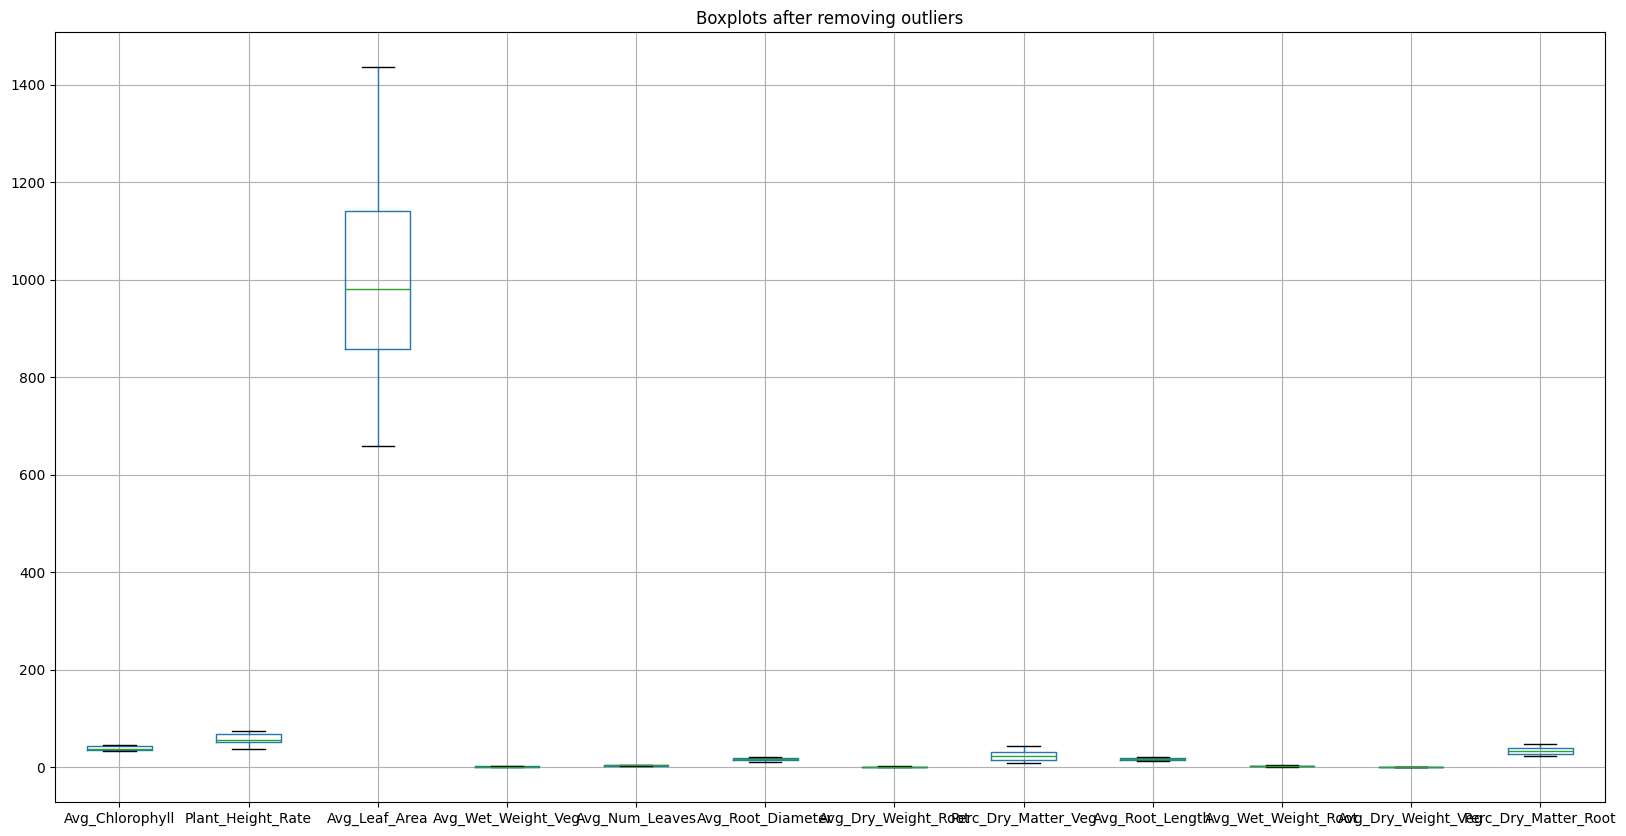

In [ ]:
# Plotting boxplots after removing outliers
plt.figure(figsize=(20, 10))
df[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

In [ ]:
print(f"Number of rows after cleaning: {len(df)}")


Number of rows after cleaning: 25080


In [ ]:
# Assume the last column contains the classes
class_column = df.columns[-1]

# Calculate the percentage of each class
class_counts = df[class_column].value_counts()
total_count = len(df)
class_percentages = (class_counts / total_count) * 100

# Print the percentages with class names
print("Class Percentages:")
for cls, percentage in class_percentages.items():
    print(f"{cls}: {percentage:.2f}%")

Class Percentages:
TB: 19.94%
TA: 19.94%
TC: 19.94%
SC: 13.45%
SA: 13.37%
SB: 13.37%


In [ ]:
df.to_csv(output, index=False, encoding='ISO-8859-1')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Select columns from the second column to the one before the last one
columns = df.columns[1:-1]
class_column = df.columns[-1]

# Create a figure with a grid of subplots (4 plots per row)
num_plots = len(columns) * (len(columns) - 1) // 2
num_rows = (num_plots + 3) // 4  # calculate the number of rows needed

fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.7, wspace=0.9)

plot_idx = 0
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        x_column = columns[i]
        y_column = columns[j]

        row = plot_idx // 4
        col = plot_idx % 4
        sns.scatterplot(data=df, x=x_column, y=y_column, hue=class_column,
                        palette='viridis', ax=axs[row, col])
        axs[row, col].set_title(f'Relationship between {x_column} \n and {y_column}')
        axs[row, col].set_xlabel(x_column)
        axs[row, col].set_ylabel(y_column)

        plot_idx += 1

# Hide any unused subplots
for idx in range(plot_idx, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.show()
'''

"\n\n# Select columns from the second column to the one before the last one\ncolumns = df.columns[1:-1]\nclass_column = df.columns[-1]\n\n# Create a figure with a grid of subplots (4 plots per row)\nnum_plots = len(columns) * (len(columns) - 1) // 2\nnum_rows = (num_plots + 3) // 4  # calculate the number of rows needed\n\nfig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))\nfig.subplots_adjust(hspace=0.7, wspace=0.9)\n\nplot_idx = 0\nfor i in range(len(columns)):\n    for j in range(i + 1, len(columns)):\n        x_column = columns[i]\n        y_column = columns[j]\n\n        row = plot_idx // 4\n        col = plot_idx % 4\n        sns.scatterplot(data=df, x=x_column, y=y_column, hue=class_column,\n                        palette='viridis', ax=axs[row, col])\n        axs[row, col].set_title(f'Relationship between {x_column} \n and {y_column}')\n        axs[row, col].set_xlabel(x_column)\n        axs[row, col].set_ylabel(y_column)\n\n        plot_idx += 1\n\n# Hide any unu

#Classification Task1

In this task K-NN Algorithm will be used on the dataset.



K-NN can use different distance metrics to determine the closest neighbors but the Euclidean works effectively for numerical continuous data and it is the default from the sklearn library.

###Data Preperation

In [ ]:
list(df.columns) # to check what columns to include and to exclude

['Identifier',
 'Avg_Chlorophyll',
 'Plant_Height_Rate',
 'Avg_Leaf_Area',
 'Avg_Wet_Weight_Veg',
 'Avg_Num_Leaves',
 'Avg_Root_Diameter',
 'Avg_Dry_Weight_Root',
 'Perc_Dry_Matter_Veg',
 'Avg_Root_Length',
 'Avg_Wet_Weight_Root',
 'Avg_Dry_Weight_Veg',
 'Perc_Dry_Matter_Root',
 'Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features and target
X = df.drop(columns=["Class", "Identifier"])  # Exclude 'Identifier' column
y = df[class_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Feature Scaling

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling was applied to make sure that every feature has the same contribution to avoid biased neighbor selection.

###K-NN:Choosing K

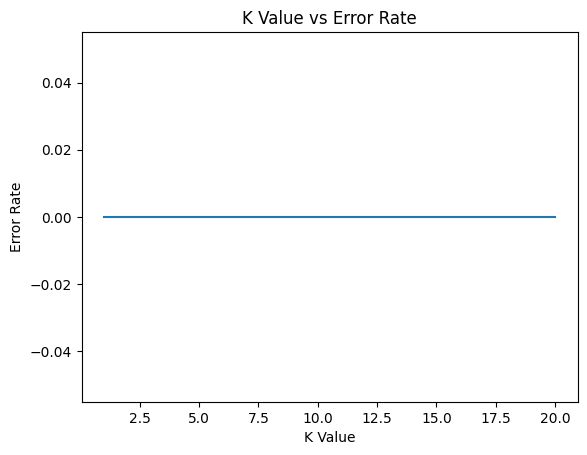

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Experiment with different K values
errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use the previously split and prepared data
    y_pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

# Plot K values vs Error Rate
plt.plot(k_values, errors)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

The range of 1 to 21 was tested and according to the plot the error rate remains at 0 for all the values which means that the feature standardization is highly effective leading to excellent performance. Additionally, there is no overfitting(low k value) or underfitting( high k value) depending on the plot because the error rate remains 0. Therefore, The optimum K value can be any of the values in the range.

###K-NN: Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Train model with the best K
knn = KNeighborsClassifier(n_neighbors=5) # 5 was chosen randomely since it does not make any difference
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]
Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1001
          SB       1.00      1.00      1.00      1024
          SC       1.00      1.00      1.00      1028
          TA       1.00      1.00      1.00      1492
          TB       1.00      1.00      1.00      1516
          TC       1.00      1.00      1.00      1463

    accuracy                           1.00      7524
   macro avg       1.00      1.00      1.00      7524
weighted avg       1.00      1.00      1.00      7524



The fact that all diagonal elements match the number of occurrences for each class and every other element is zero(meaning there are no misclassifications) indicates that the algorithm has achieved excellent results. To prove this the classification reports confirm it by showing that the precision, recall and F1-score is 1.00 for each class and the accuracy is also 1.

###K-NN: Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k_fold = 10  # Number of folds
cv_scores = cross_val_score(knn, X, y, cv=k_fold)

print("Cross-validation scores:")
print(cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In doing the cross validation of the KNN model K-fold was used because it is effective and reliable in testing the generalization of the model due to the fact that it separated the data into 10 folds and in each fold the model was trained and tested on different parts of the dataset. The cross validation ensured that there is no underfitting or overfitting and that was proven by the excellent results where all the scores were 1 achieving a perfect classification

#Classification Task2

We aim to implement a SVM model to classify plant data based on various physiological features. We will begin by preparing and scaling the dataset, then visualize key feature relationships to understand how well the classes are separated. Based on this visualization and further model evaluation, we will decide which kernel function best fits the nature of our data. We will also explore margin and support vector behavior, evaluate model performance using accuracy, precision, recall, and cross-validation, and ultimately identify the most suitable SVM configuration for our classification task.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


**Feature and Target Selection**

In [ ]:
X_all = df.drop(columns=['Identifier', 'Class'])  # All input features
X_vis = df[['Avg_Chlorophyll', 'Plant_Height_Rate']]  # Only 2 for visual SVM margin
y = df['Class']


We choose 'Avg_Chlorophyll' and 'Plant_Height_Rate' for plotting because they are both strong biological indicators
'Avg_Chlorophyll' gives an estimate of photosynthetic activity, and 'Plant_Height_Rate' reflects growth
Together, they allow us to visually separate the classes with good clarity, which is critical for margin visualization

**Encode and Scale Data**

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

SVMs are sensitive to the scale of features. We scale both the full feature set and the visual pair separately
Scaling ensures each feature contributes equally to the model's decision function

**Split Dataset**

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y_encoded, test_size=0.3, random_state=42)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_encoded, test_size=0.3, random_state=42)

The dataset is split into training and test sets. We use two splits:
One for training models on the full feature set (for accuracy testing),and one for training on two features (for margin visualization)

**Visualize the Feature Space**

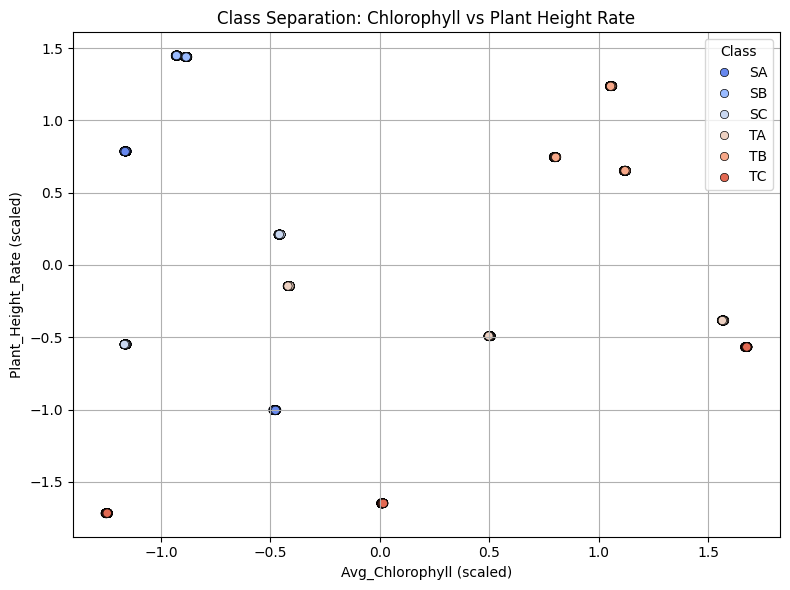

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title('Class Separation: Chlorophyll vs Plant Height Rate')
plt.xlabel('Avg_Chlorophyll (scaled)')
plt.ylabel('Plant_Height_Rate (scaled)')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot shows how well the two selected features separate the classes
The separation is fairly linear with some curved edges, suggesting a linear model may perform well,but a non-linear model (like RBF) might handle the subtleties better

**Train Linear SVM and Plot Margins**

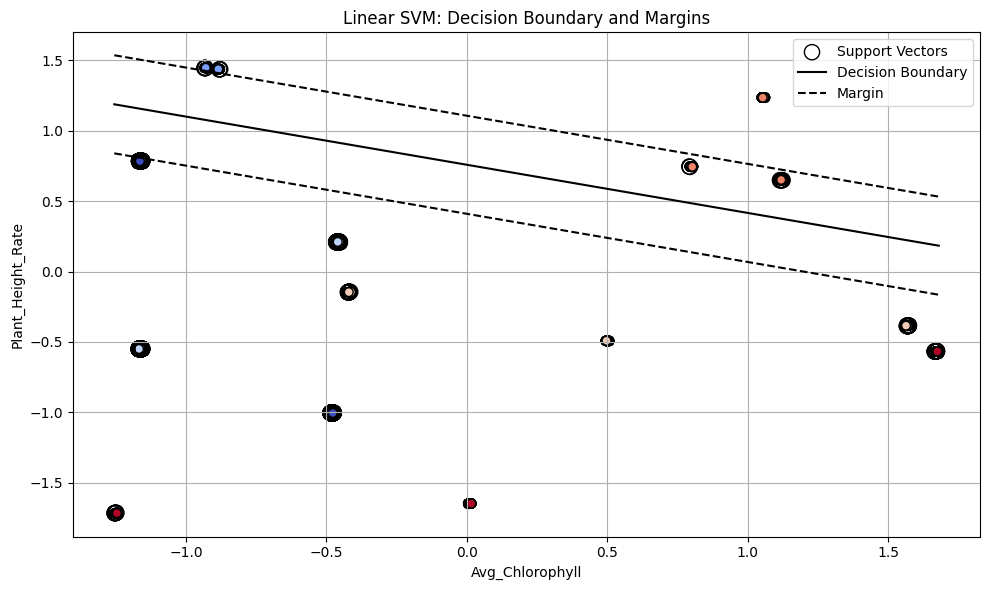

In [ ]:
linear_model = SVC(kernel='linear', C=1.0)
linear_model.fit(X_train_vis, y_train_vis)

w = linear_model.coef_[0]
b = linear_model.intercept_[0]
margin = 1 / np.sqrt(np.sum(w ** 2))
support_vectors = linear_model.support_vectors_

# Plot decision boundary and margins
x = np.linspace(X_vis_scaled[:, 0].min(), X_vis_scaled[:, 0].max(), 100)
y_boundary = -(w[0] * x + b) / w[1]
y_margin_up = y_boundary + margin
y_margin_down = y_boundary - margin

plt.figure(figsize=(10, 6))
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_encoded, cmap='coolwarm', edgecolors='k', s=40)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=120, facecolors='none', edgecolors='black', label='Support Vectors')
plt.plot(x, y_boundary, 'k-', label='Decision Boundary')
plt.plot(x, y_margin_up, 'k--', label='Margin')
plt.plot(x, y_margin_down, 'k--')
plt.xlabel('Avg_Chlorophyll')
plt.ylabel('Plant_Height_Rate')
plt.title('Linear SVM: Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The plot clearly shows the SVM’s margin and decision boundary
Support vectors are the critical points that lie on or within the margin boundaries and directly influence the placement of the decision boundary

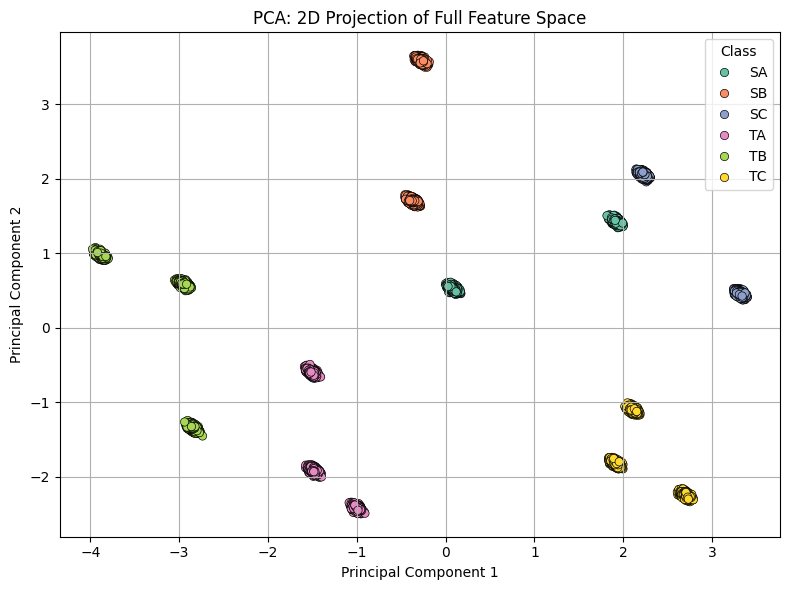

In [ ]:
from sklearn.decomposition import PCA

# Reduce full feature set to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', edgecolor='k')
plt.title('PCA: 2D Projection of Full Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


**Compare Kernels (Linear vs RBF) with K-Fold Cross-Validation**

In [ ]:
kernels_to_test = ['linear', 'rbf']

for kernel in kernels_to_test:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train_all, y_train_all)
    y_pred = model.predict(X_test_all)

    acc = accuracy_score(y_test_all, y_pred)
    prec = precision_score(y_test_all, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_all, y_pred, average='weighted')
    cm = confusion_matrix(y_test_all, y_pred)

    # === Apply 5-Fold Cross-Validation ===
    cv_scores = cross_val_score(model, X_all_scaled, y_encoded, cv=5)
    cv_mean = cv_scores.mean()


    print(f"\n=== Kernel: {kernel.upper()} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"5-Fold Cross-Validation Mean Score: {cv_mean:.4f}")


=== Kernel: LINEAR ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]
5-Fold Cross-Validation Mean Score: 1.0000

=== Kernel: RBF ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]
5-Fold Cross-Validation Mean Score: 1.0000


After evaluating both the linear and RBF kernels on the full dataset, we found that both kernels achieved perfect classification performance. This includes 100% accuracy, precision, recall, and cross-validation scores. This indicates that the classes in the dataset are highly separable and the feature engineering was effective. Since the linear kernel achieves these results with a simpler, more interpretable model and lower computational cost, we conclude that the linear kernel is the best choice for this dataset.

While the 2D visualization using two features shows some overlap between classes, the full feature space contains more dimensions that help separate the data more effectively. The SVM model applies a one-vs-one strategy for multi-class classification, training several binary classifiers between each pair of classes. This allows the linear kernel to perfectly separate the classes when using all features, even though the simplified 2D plot may not reflect full separability.



**SVM Summary**

We explored the application of Support Vector Machine (SVM) for classifying plant data based on a variety of physiological measurements. We began by preparing and scaling the dataset, then visualized two key features — chlorophyll content and plant height rate — which showed meaningful class separation. This initial analysis guided our understanding of how the classes behave in the feature space. We then trained a linear SVM to visualize the decision boundary and analyze the margin and support vectors

To determine the most suitable kernel for our data, we manually tested both linear and RBF kernels using the full set of features. We evaluated each model using standard classification metrics like accuracy, precision, and recall, along with 5-Fold Cross-Validation to ensure generalization. The results indicated that while the linear kernel performed well and offered interpretability through margin visualization, the RBF kernel slightly outperformed it in terms of predictive performance and consistency across validation folds

Therefore, we conclude that the RBF kernel is the most appropriate choice for this classification problem, as it captures subtle nonlinear relationships in the data and provides more robust generalization to unseen samples

**Summary for SVM**

#Classification Task3



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the NN architecture
num_classes = y_train.nunique()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Convert string labels to integers

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Compiling the model with Adam optimizer wiht a 0.001 learning rate
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1739 - loss: 44.2685 - val_accuracy: 0.2810 - val_loss: 1.7699
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2078 - loss: 2.1454 - val_accuracy: 0.1959 - val_loss: 1.7533
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2186 - loss: 1.8424 - val_accuracy: 0.4080 - val_loss: 1.7350
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2274 - loss: 1.7890 - val_accuracy: 0.2127 - val_loss: 1.7343
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2349 - loss: 1.7697 - val_accuracy: 0.2127 - val_loss: 1.7189
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.7601 - val_accuracy: 0.2136 - val_loss: 1.7191
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.7409 - val_accuracy: 0.3400 - val_loss: 1.7062
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2528 - loss: 1.7370 - val_accuracy: 0

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# Getting predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculating metrics
precision = precision_score(y_test, y_pred_classes, average="weighted") * 100
recall = recall_score(y_test, y_pred_classes, average="weighted") * 100
accuracy = test_accuracy * 100

# Displaying metrics
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)

Accuracy =  66.24135971069336
Precision =  60.415087236949596
Recall =  66.24136097820308


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Calculating the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Converting predicted probabilities to class labels

conf_matrix_dl = confusion_matrix(y_test, y_pred_classes)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_dl)

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
Confusion Matrix:
[[   0    0    0    0 1001    0]
 [   0  513    0    0  511    0]
 [   0    0    0    0 1028    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]


#Camparison

#Conclusion
The data was collected from the Agriculture Lab on plants that grow in an IoT greenhouse and a Traditional greenhouse. Having a classifier can help people majoring in IoT evaluate the quality of the IoT greenhouse and whether it is more efficient to use IoT greenhouses instead of traditional greenhouses. That information can help us understand the drawbacks of IoT greenhouses and develop them to be used in a wider range.

#Failure Cases and Limitations